In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/COLAB BB")

Mounted at /content/drive


**Dataset Asli**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def tampilkan_gambar(daftar_gambar):
    fig, axs = plt.subplots(3, 4, figsize=(18, 18))
    for i in range(3):
        for j in range(4):
            idx = i * 4 + j
            if idx < len(daftar_gambar):
                axs[i, j].imshow(daftar_gambar[idx])
            axs[i, j].axis('off')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
    plt.show()

gambar_1 = plt.imread('Salinan ke-1.jpeg')
gambar_2 = plt.imread('Salinan ke-2.jpeg')
gambar_3 = plt.imread('Salinan ke-3.jpeg')
gambar_4 = plt.imread('Salinan ke-4.jpeg')
gambar_5 = plt.imread('Salinan ke-5.jpeg')
gambar_6 = plt.imread('Salinan ke-6.jpeg')
gambar_7 = plt.imread('Salinan ke-7.jpeg')
gambar_8 = plt.imread('Salinan ke-8.jpeg')
gambar_9 = plt.imread('Salinan ke-9.jpeg')
gambar_10 = plt.imread('Salinan ke-10.jpeg')

daftar_gambar = [gambar_1, gambar_2, gambar_3, gambar_4, gambar_5, gambar_6, gambar_7, gambar_8, gambar_9, gambar_10]
tampilkan_gambar(daftar_gambar)

Output hidden; open in https://colab.research.google.com to view.

**Tampilan Dataset Setelah melalui proses**


*   Cropping image
*   Mengubah bayangan dalam gambar



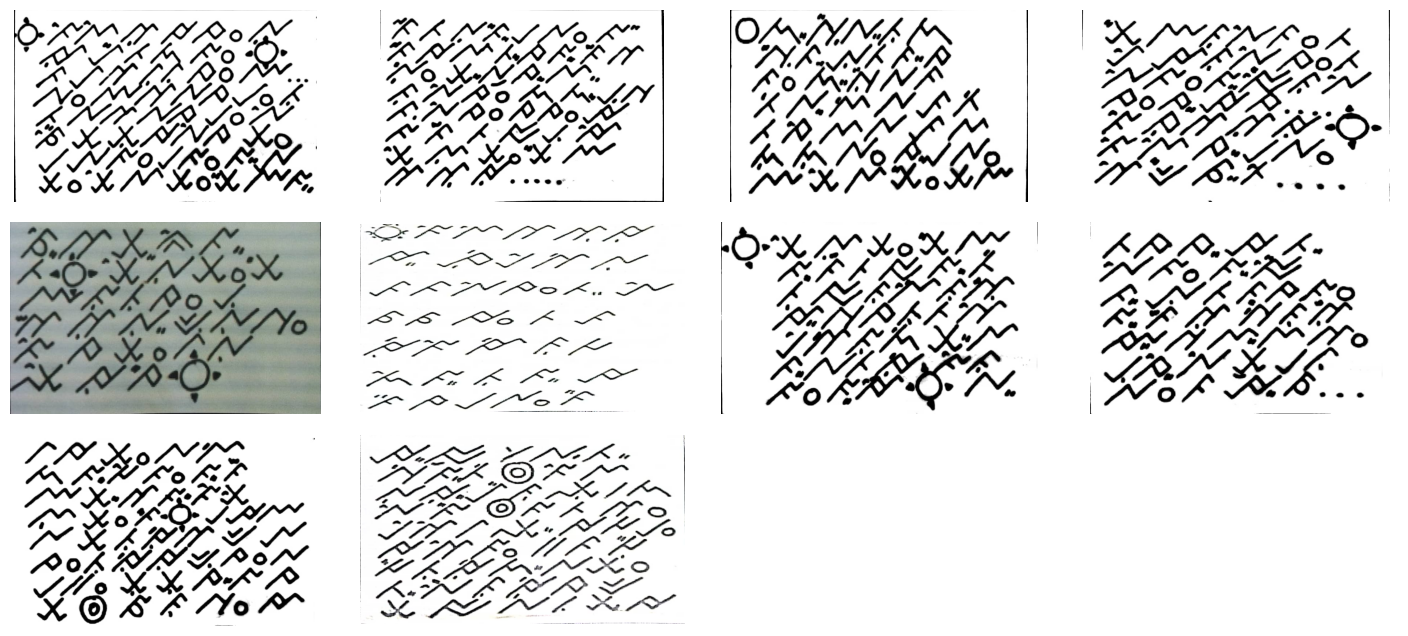

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def tampilkan_gambar(daftar_gambar):
    fig, axs = plt.subplots(3, 4, figsize=(18, 8))
    for i in range(3):
        for j in range(4):
            idx = i * 4 + j
            if idx < len(daftar_gambar):
                axs[i, j].imshow(daftar_gambar[idx])
            axs[i, j].axis('off')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
    plt.show()

gambar_1 = plt.imread('Hal1.jpg')
gambar_2 = plt.imread('Hal2.jpg')
gambar_3 = plt.imread('Hal3.jpg')
gambar_4 = plt.imread('Hal4.jpg')
gambar_5 = plt.imread('Hal5.jpg')
gambar_6 = plt.imread('Hal6.jpg')
gambar_7 = plt.imread('Hal7.jpg')
gambar_8 = plt.imread('Hal8.jpg')
gambar_9 = plt.imread('Hal9.jpg')
gambar_10 = plt.imread('Hal10.jpg')

daftar_gambar = [gambar_1, gambar_2, gambar_3, gambar_4, gambar_5, gambar_6, gambar_7, gambar_8, gambar_9, gambar_10]
tampilkan_gambar(daftar_gambar)

**Pre-processing**
- Warna ke Biner
- Thresholding

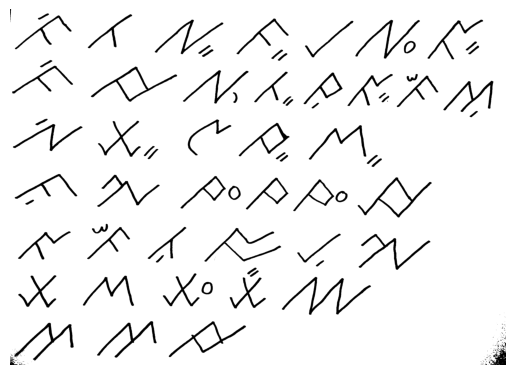

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def tampilkan_gambar(gambar):
    plt.imshow(gambar.astype('float32'), cmap='gray')
    plt.axis('off')
    plt.show()

gambar_awal = cv2.imread('Terai.jpg', cv2.IMREAD_GRAYSCALE)
threshold = 127

_, gambar_biner = cv2.threshold(gambar_awal, threshold, 255, cv2.THRESH_BINARY)
tampilkan_gambar(gambar_biner)

**Resize**

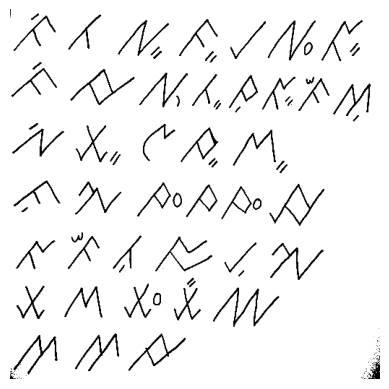

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


# Resize citra
resized_image = cv2.resize(gambar_biner, (512, 512))

# Tampilkan citra hasil resize
plt.imshow(resized_image, cmap='gray')
plt.axis('off')
plt.show()

**Morfologi Citra**

Apakah Anda ingin melakukan erosi atau dilasi? (erosion/dilation): dilation
Masukkan ukuran kernel (angka bulat positif): 2


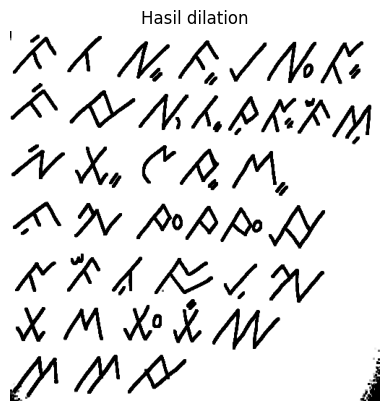

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
image = resized_image

# Fungsi untuk memproses erosi atau dilasi sesuai pilihan pengguna
def morphological_operation(image, operation, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1

    if operation == 'erosion':
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
        return cv2.dilate(image, kernel, iterations=1)  # Balikkan erosi dan dilasi
    elif operation == 'dilation':
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
        return cv2.erode(image, kernel, iterations=1)  # Balikkan erosi dan dilasi
    else:
        print("Pilihan tidak valid. Harap masukkan 'erosion' atau 'dilation'.")
        return image

# Tanyakan pilihan proses morfologi kepada pengguna
choice = input("Apakah Anda ingin melakukan erosi atau dilasi? (erosion/dilation): ")

# Tanyakan ukuran kernel kepada pengguna dan pastikan nilai yang dimasukkan adalah positif
while True:
    try:
        kernel_size = int(input("Masukkan ukuran kernel (angka bulat positif): "))
        if kernel_size > 0:
            break
        else:
            print("Masukkan angka bulat positif!")
    except ValueError:
        print("Masukkan angka bulat positif!")

# Proses erosi atau dilasi sesuai pilihan pengguna
processed_image = morphological_operation(image, choice, kernel_size)

# Tampilkan citra hasil erosi atau dilasi
plt.imshow(processed_image, cmap='gray')
plt.axis('off')
plt.title('Hasil ' + choice)
plt.show()

**Bounding Box**

In [7]:
#/content/drive/My Drive/COLAB BB/
#/content/drive/My Drive/COLAB BB/aksara/sample
#/content/drive/My Drive/COLAB BB/model-no-agumented-komering/model.h5

In [8]:
#import cv2
#import numpy as np
#import matplotlib.pyplot as plt

# Mengasumsikan processed_image adalah gambar sumber sebelum diresize
#resized_image2 = cv2.resize(processed_image, (512, 512))

# Convert gambar menjadi RGB agar kompatibel dengan matplotlib
#resized_image2_rgb = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB)

# Find the contours in the image
#contours, hierarchy = cv2.findContours(resized_image2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding boxes of the contours
#bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Draw the bounding boxes on the image with the desired color
#for bounding_box in bounding_boxes:
    #x, y, w, h = bounding_box
    #cv2.rectangle(resized_image2_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Warna bounding box hijau

# Display the image with the bounding boxes
#plt.imshow(resized_image2_rgb)
#plt.axis('off')
#plt.show()

In [9]:
#import cv2
#import numpy as np
#import matplotlib.pyplot as plt
#import os
#from keras.models import load_model

# Load model and data training folder
#model = load_model('/content/drive/My Drive/COLAB BB/model-no-agumented-komering/model.h5')
#data_training_folder = '/content/drive/My Drive/COLAB BB/aksara/sample'

# Get a list of sample image filenames
#sample_image_filenames = os.listdir(data_training_folder)

# Resize gambar
#resized_image2 = cv2.resize(processed_image, (512, 512))

# Convert gambar menjadi RGB agar kompatibel dengan matplotlib
#resized_image2_rgb = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB)

# Find the contours in the image
#contours, hierarchy = cv2.findContours(resized_image2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding boxes of the contours
#bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Draw the bounding boxes on the image with the desired color
#for bounding_box, sample_filename in zip(bounding_boxes, sample_image_filenames):
    #x, y, w, h = bounding_box
    #cropped_image = resized_image2[y:y+h, x:x+w]

    # Get the object name from the sample filename
    #object_name = os.path.splitext(sample_filename)[0]

    # Calculate text position to ensure visibility
    #text_x = max(x, 5)  # Avoid going beyond left image boundary
    #text_y = max(y - 10, 10)  # Place text above the bounding box

    # Draw bounding box and object name on the image
    #cv2.rectangle(resized_image2_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding box
    #cv2.putText(resized_image2_rgb, object_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image with the bounding boxes and object names
#plt.imshow(resized_image2_rgb)
#plt.axis('off')
#plt.show()

In [10]:
#import cv2
#import numpy as np
#import matplotlib.pyplot as plt
#import os
#from keras.models import load_model

# Load model and data training folder
#model = load_model('/content/drive/My Drive/COLAB BB/model-no-agumented-komering/model.h5')
#data_training_folder = '/content/drive/My Drive/COLAB BB/aksara/sample'

# Get a list of sample image filenames
#sample_image_filenames = os.listdir(data_training_folder)

# Binarize the image using adaptive thresholding
#_, binary_image = cv2.threshold(processed_image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Resize gambar
#resized_image2 = cv2.resize(binary_image, (512, 512))

# Convert gambar menjadi RGB agar kompatibel dengan matplotlib
#resized_image2_rgb = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB)

# Find the contours in the image
#contours, hierarchy = cv2.findContours(resized_image2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding boxes of the contours
#bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Draw the bounding boxes on the image with the desired color
#for bounding_box, sample_filename in zip(bounding_boxes, sample_image_filenames):
    #x, y, w, h = bounding_box
    #cropped_image = resized_image2[y:y+h, x:x+w]

    # Preprocess the cropped image before prediction
    #resized_cropped_image = cv2.resize(cropped_image, (48, 48))  # Set input_shape based on your model's input size
    #resized_cropped_image = np.expand_dims(resized_cropped_image, axis=-1)
    #resized_cropped_image = resized_cropped_image / 255.0  # Normalize pixel values

    # Make the prediction
    #prediction = model.predict(np.array([resized_cropped_image]), verbose=0)

    # Get the predicted class label
    #predicted_class = np.argmax(prediction)

    # Get the object name from the sample filename
    #object_name = os.path.splitext(sample_filename)[0]

    # Calculate text position to ensure visibility
    #text_x = max(x, 5)  # Avoid going beyond left image boundary
    #text_y = max(y - 10, 10)  # Place text above the bounding box

    # Draw bounding box and object name on the image
    #cv2.rectangle(resized_image2_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue bounding box
    #cv2.putText(resized_image2_rgb, object_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with the bounding boxes and object names
#plt.imshow(resized_image2_rgb)
#plt.axis('off')
#plt.show()

In [11]:
#import cv2
#import numpy as np
#import matplotlib.pyplot as plt
#import os
#from keras.models import load_model

# Load model and data training folder
#model = load_model('/content/drive/My Drive/COLAB BB/model-no-agumented-komering/model.h5')
#data_training_folder = '/content/drive/My Drive/COLAB BB/aksara/sample'

# Get a list of sample image filenames
#sample_image_filenames = os.listdir(data_training_folder)

# Binarize the image using adaptive thresholding
#_, binary_image = cv2.threshold(processed_image, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Resize gambar
#resized_image2 = cv2.resize(binary_image, (512, 512))

# Convert gambar menjadi RGB agar kompatibel dengan matplotlib
#resized_image2_rgb = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB)

# Find the contours in the image
#contours, hierarchy = cv2.findContours(resized_image2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding boxes of the contours
#bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Draw the bounding boxes on the image with the desired color
#for bounding_box, sample_filename in zip(bounding_boxes, sample_image_filenames):
    #x, y, w, h = bounding_box
    #cropped_image = resized_image2[y:y+h, x:x+w]

    # Preprocess the cropped image before prediction
    #resized_cropped_image = cv2.resize(cropped_image, (48, 48))  # Set input_shape based on your model's input size
    #resized_cropped_image = np.expand_dims(resized_cropped_image, axis=-1)
    #resized_cropped_image = resized_cropped_image / 255.0  # Normalize pixel values

    # Make the prediction
    #prediction = model.predict(np.array([resized_cropped_image]), verbose=0)

    # Get the predicted class label
    #predicted_class = np.argmax(prediction)

    # Get the object name from the sample filename
    #object_name = os.path.splitext(sample_filename)[0]

    # Calculate text position to ensure visibility
    #text_x = max(x, 5)  # Avoid going beyond left image boundary
    #text_y = max(y - 10, 10)  # Place text above the bounding box

    # Draw bounding box and object name on the image
    #cv2.rectangle(resized_image2_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)  # White bounding box
    #cv2.putText(resized_image2_rgb, object_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image with the bounding boxes and object names
#plt.imshow(resized_image2_rgb)
#plt.axis('off')
#plt.show()

In [12]:
#import cv2
#import numpy as np
#import matplotlib.pyplot as plt
#import os
#from keras.models import load_model

# Load model and data training folder
#model = load_model('/content/drive/My Drive/COLAB BB/model-no-agumented-komering/model.h5')
#data_training_folder = '/content/drive/My Drive/COLAB BB/aksara/sample'

# Get a list of sample image filenames
#sample_image_filenames = os.listdir(data_training_folder)

# Binarize the image using adaptive thresholding
#_, binary_image = cv2.threshold(processed_image, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Resize gambar
#resized_image2 = cv2.resize(binary_image, (512, 512))

# Convert gambar menjadi RGB agar kompatibel dengan matplotlib
#resized_image2_rgb = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB)

# Find the contours in the image
#contours, hierarchy = cv2.findContours(resized_image2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Define the minimum and maximum area thresholds for valid objects
#min_area = 127  # Adjust this threshold based on your image and object sizes
#max_area = 4000  # Adjust this threshold based on your image and object sizes

# Find the bounding boxes of the contours that meet the area criteria
#bounding_boxes = [cv2.boundingRect(c) for c in contours if min_area <= cv2.contourArea(c) <= max_area]

# Draw the bounding boxes on the image with the desired color
#for bounding_box, sample_filename in zip(bounding_boxes, sample_image_filenames):
    #x, y, w, h = bounding_box
    #cropped_image = resized_image2[y:y+h, x:x+w]

    # Preprocess the cropped image before prediction
    #resized_cropped_image = cv2.resize(cropped_image, (48, 48))  # Set input_shape based on your model's input size
    #resized_cropped_image = np.expand_dims(resized_cropped_image, axis=-1)
    #resized_cropped_image = resized_cropped_image / 255.0  # Normalize pixel values

    # Make the prediction
    #prediction = model.predict(np.array([resized_cropped_image]), verbose=0)

    # Get the predicted class label
    #predicted_class = np.argmax(prediction)

    # Get the object name from the sample filename
    #object_name = os.path.splitext(sample_filename)[0]

    # Calculate text position to ensure visibility
    #text_x = max(x, 5)  # Avoid going beyond left image boundary
    #text_y = max(y - 10, 10)  # Place text above the bounding box

    # Draw bounding box and object name on the image
    #cv2.rectangle(resized_image2_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)  # White bounding box
    #cv2.putText(resized_image2_rgb, object_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image with the bounding boxes and object names
#plt.imshow(resized_image2_rgb)
#plt.axis('off')
#plt.show()

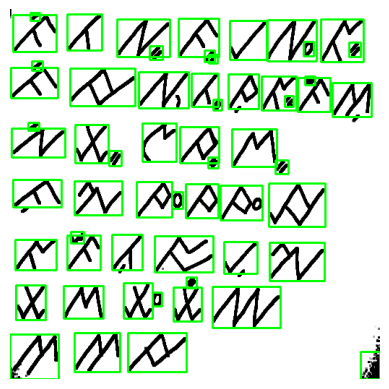

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from keras.models import load_model

def read_labels_from_json(json_filename):
    with open(json_filename, 'r') as json_file:
        labels_data = json.load(json_file)
    return labels_data

# Define a sorting key function
def sort_by_top_left(contour):
    x, y, _, _ = cv2.boundingRect(contour)
    return (y // 10) * 10000 + x

# Load model and data training folder
model = load_model('/content/drive/My Drive/COLAB BB/model-no-agumented-komering/model.h5')

# Load label information from JSON file
labels_data = read_labels_from_json('/content/drive/My Drive/COLAB BB/model-no-agumented-komering/label_aksara.json')

# Extract labels from the loaded JSON data
labels = list(labels_data.keys())

# Resize gambar
resized_image2 = cv2.resize(processed_image, (512, 512))

# Apply thresholding to create a binary image
_, thresh = cv2.threshold(resized_image2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours and sort them by position
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours, key=sort_by_top_left)

# Convert gambar menjadi RGB agar kompatibel dengan matplotlib
resized_image2_rgb = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB)

# Process each contour
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # Ensure minimum width and height for valid objects
    if w > 10 and h > 10:
        # Draw bounding box on the image
        cv2.rectangle(resized_image2_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with the bounding boxes
plt.imshow(resized_image2_rgb)
plt.axis('off')
plt.show()

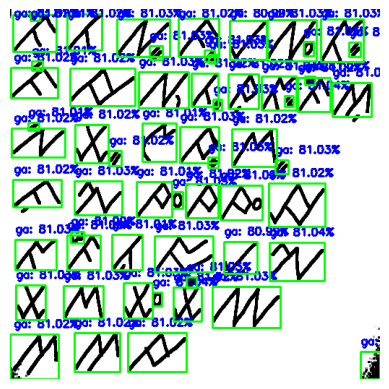

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from keras.models import load_model

def read_labels_from_json(json_filename):
    with open(json_filename, 'r') as json_file:
        labels_data = json.load(json_file)
    return labels_data

def predict_detected_aksara(model, image, width=48, height=48):
    resized_image3 = cv2.resize(image, (width, height))
    input_arr = resized_image3.reshape((1, width, height, 1)) / 255.0  # Normalize input
    prediction = model.predict(input_arr, verbose=0)
    predicted_label = np.argmax(prediction)

    sorting = (-prediction).argsort()
    prob = prediction[0][predicted_label] * 100
    prob = "%.2f" % round(prob, 2)

    return predicted_label, prob

def generate_color(score):
    if score > 80:
        color = (0, 255, 0)  # Green
    elif score > 50:
        color = (0, 0, 255)  # Red
    else:
        color = (255, 0, 0)  # Blue
    return color

# Define a sorting key function
def sort_by_top_left(contour):
    x, y, _, _ = cv2.boundingRect(contour)
    return (y // 10) * 10000 + x

# Load model and data training folder
model = load_model('/content/drive/My Drive/COLAB BB/model-no-agumented-komering/model.h5')

# Load label information from JSON file
labels_data = read_labels_from_json('/content/drive/My Drive/COLAB BB/model-no-agumented-komering/label_aksara.json')

# Extract labels from the loaded JSON data
labels = list(labels_data.keys())

# Resize gambar
resized_image2 = cv2.resize(processed_image, (512, 512))

# Apply thresholding to create a binary image
_, thresh = cv2.threshold(resized_image2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours and sort them by position
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours, key=sort_by_top_left)

# Convert gambar menjadi RGB agar kompatibel dengan matplotlib
resized_image2_rgb = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB)

# Process each contour
prediction_results = []  # List to store prediction results
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # Ensure minimum width and height for valid objects
    if w > 10 and h > 10:
        cropped_image = resized_image[y:y+h, x:x+w]

        # Predict object label using the loaded model
        predicted_label, prob = predict_detected_aksara(model, cropped_image)

        # Get the object name based on the label
        object_name = labels[predicted_label]

        # Store prediction result in the list
        prediction_results.append((object_name, prob))

        # Calculate text position to ensure visibility
        text_x = max(x, 5)
        text_y = max(y - 10, 10)

        # Draw bounding box and object name on the image
        cv2.rectangle(resized_image2_rgb, (x, y), (x + w, y + h), generate_color(float(prob)), 2)
        text = f"{object_name}: {prob}%"
        cv2.putText(resized_image2_rgb, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image with the bounding boxes and object names
plt.imshow(resized_image2_rgb)
plt.axis('off')
plt.show()

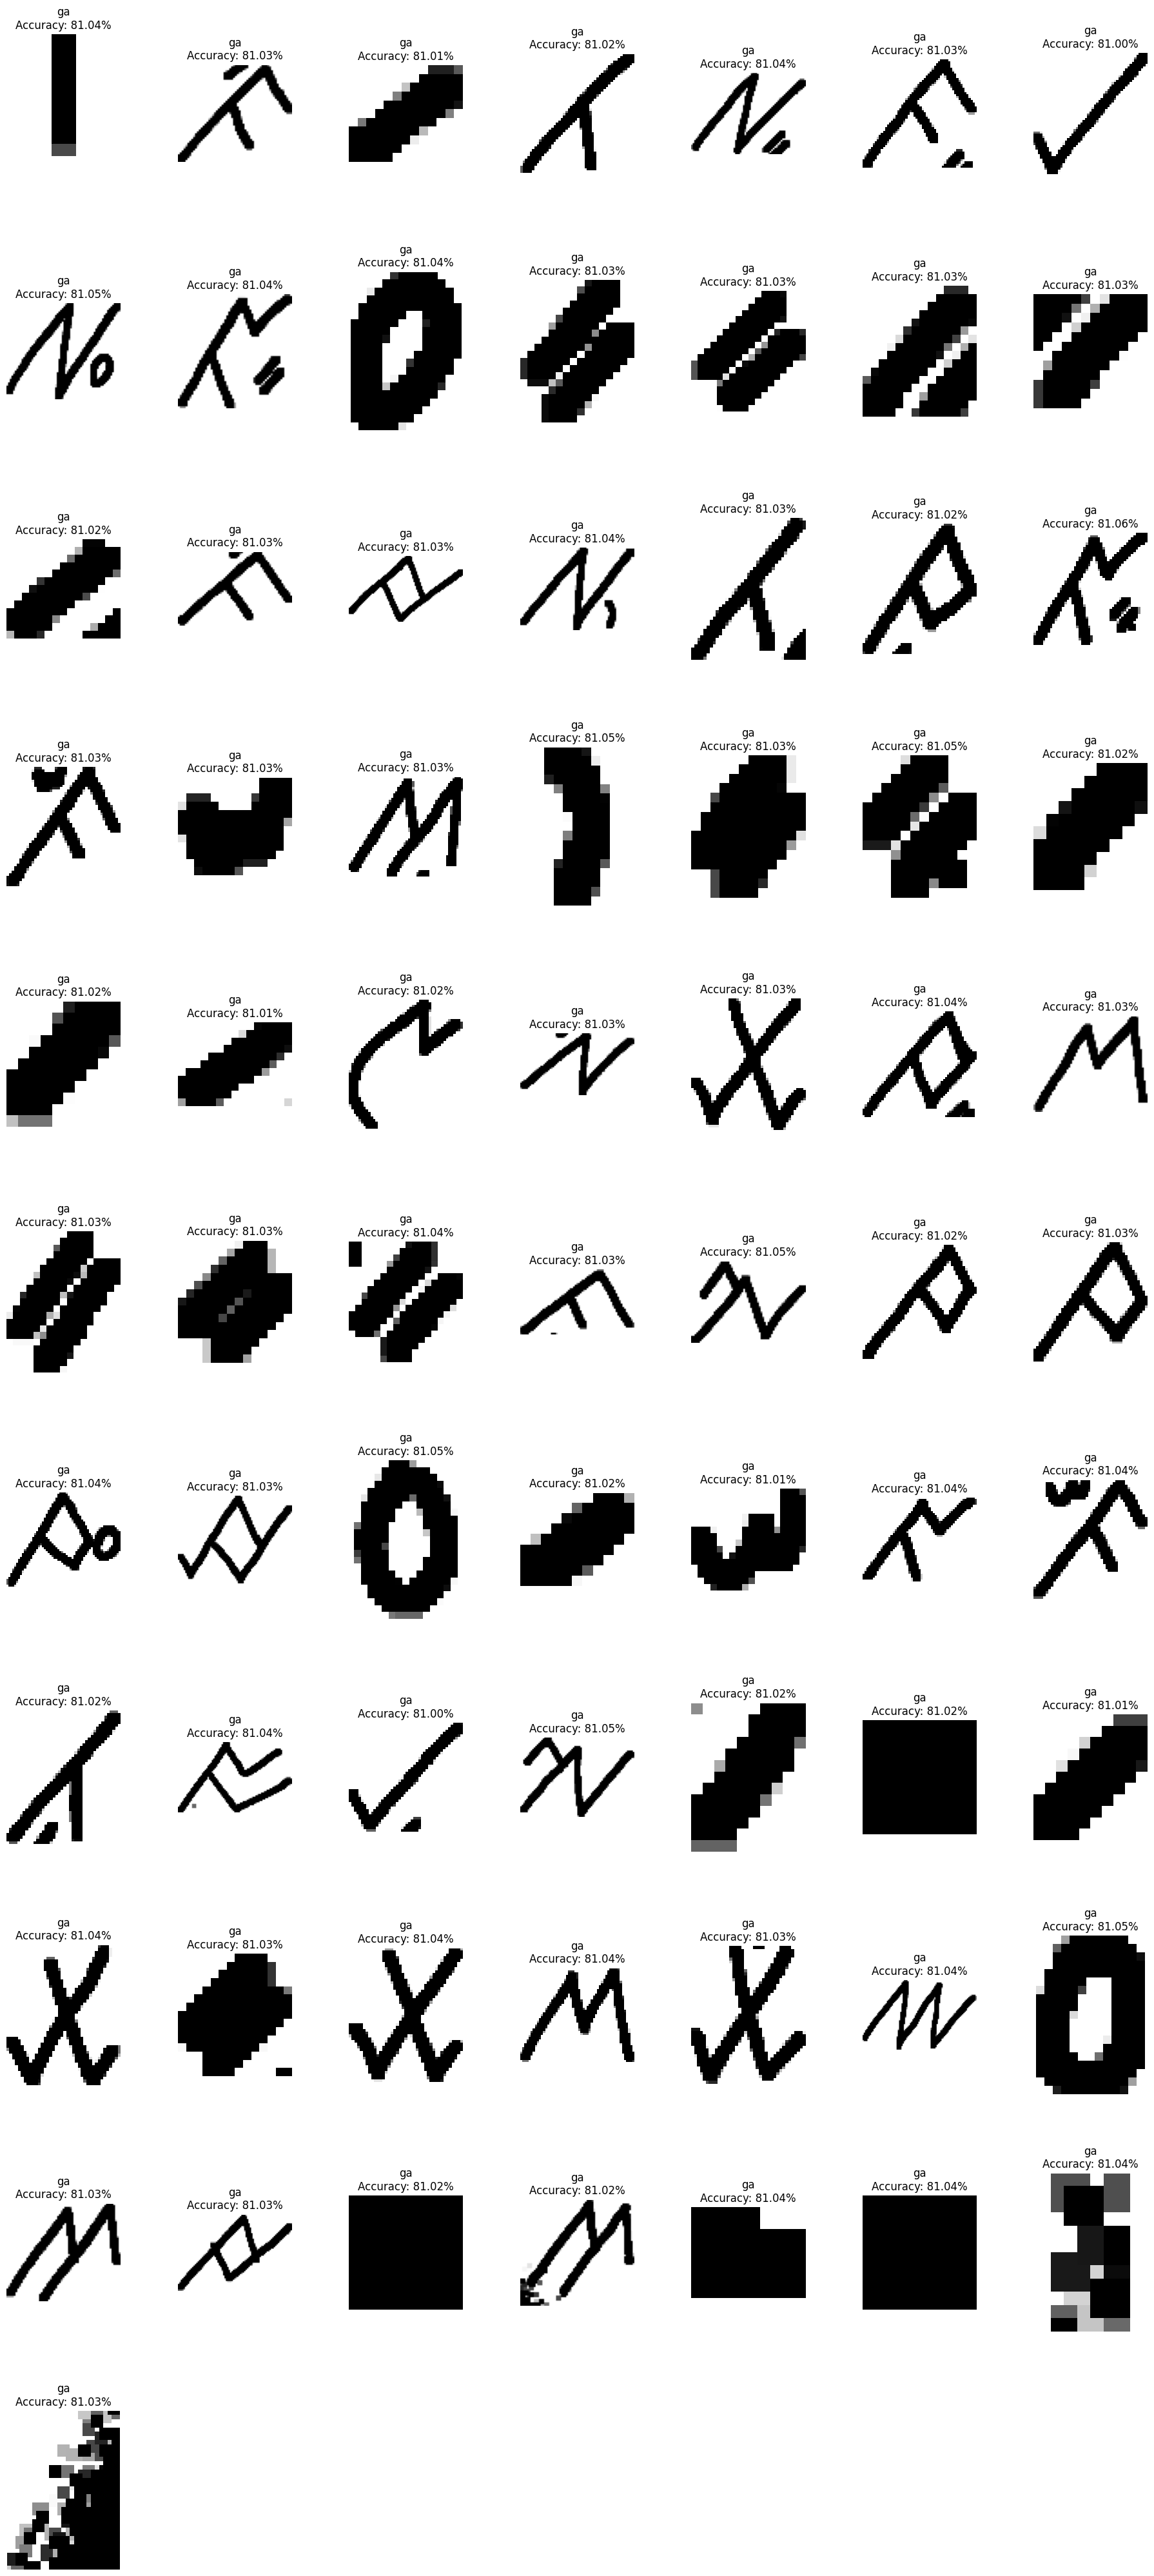

In [26]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import load_model

# Load the model and other required resources (similar to Kode 1)
model = load_model('/content/drive/My Drive/COLAB BB/model-no-agumented-komering/model.h5')
labels_data = read_labels_from_json('/content/drive/My Drive/COLAB BB/model-no-agumented-komering/label_aksara.json')
labels = list(labels_data.keys())

# Assuming you have contours from the previous code (sorted_contours) as well as the resized image (resized_image2_rgb) from Kode 1

# Calculate the number of columns based on the total contours
total_contours = len(sorted_contours)
num_columns = 7  # You can adjust the number of columns as needed
num_rows = (total_contours + num_columns - 1) // num_columns

# Create a new figure for displaying the cropped images
fig_width = 18
fig_height = 4 * num_rows  # Adjust the height as needed
plt.figure(figsize=(fig_width, fig_height))

# Loop through the sorted contours and display the cropped images along with predictions
for i, contour in enumerate(sorted_contours, start=1):
    x, y, w, h = cv2.boundingRect(contour)
    cropped_image = resized_image2[y:y+h, x:x+w]

    # Preprocess the cropped image before prediction (same as before)
    resized_cropped_image = cv2.resize(cropped_image, (48, 48))
    resized_cropped_image = np.expand_dims(resized_cropped_image, axis=-1)
    resized_cropped_image = resized_cropped_image / 255.0

    # Make the prediction (same as before)
    prediction = model.predict(np.array([resized_cropped_image]), verbose=0)
    predicted_class = np.argmax(prediction)
    object_name = labels[predicted_class]
    accuracy = prediction[0][predicted_class] * 100

    # Plot the cropped image with label and accuracy as subplot
    plt.subplot(num_rows, num_columns, i)
    plt.imshow(cropped_image, cmap='gray')  # Display the RGB image
    plt.title(f'{object_name}\nAccuracy: {accuracy:.2f}%')
    plt.axis('off')

# Adjust spacing for layout
plt.tight_layout(rect=[0, 0.03, 1, 0.94])  # Adjust spacing for title
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Add spacing and margins
plt.show()
